In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

In [3]:
dir_p = "dataset/"
def dataset_yuklash(path):
    rasmlar = []
    holat = ["with_mask","without_mask"]
    for i in holat:
        for rasm_path in glob.glob(os.path.join(path,i,'*')):
            try:
                maskali = cv2.imread(rasm_path)
                maskali = cv2.cvtColor(maskali,cv2.COLOR_BGR2RGB)
                rasmlar.append((maskali,i))
            except:
                pass
    return rasmlar

In [4]:
maska = dataset_yuklash(dir_p)

In [5]:
random.shuffle(maska)

In [10]:
np.savetxt("mask.out",maska)

C:\Users\DNS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e %.18e')

In [5]:
y_size = [i[0].shape[0] for i in maska]
x_size = [i[0].shape[1] for i in maska]

In [6]:
len(y_size)

3810

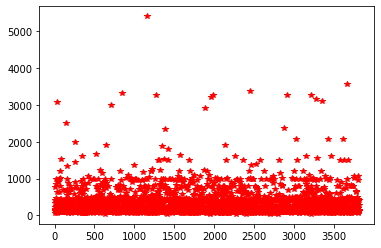

In [7]:
plt.plot(np.arange(3810),y_size,"r*")

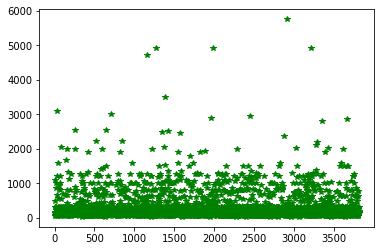

In [8]:
plt.plot(np.arange(3810),x_size,"g*")

In [9]:
# Rasmlarni bir xil o'lchamga keltirish
def ulcham(maska):
    maska = cv2.resize(maska,(224,224))
    return maska

# Maska bor yoki yo'qligini binaryga o'tkazish
def holat(holatlar):
    if holatlar=="with_mask":
        holatlar=1
    else:
        holatlar = 0
    return holatlar

# Tayyor rasmlar
def tayyor_rasm(rasmlar):
    tayyor_rasmlar = []
    for i in rasmlar:
        tayyor_rasmlar.append((ulcham(i[0]),holat(i[1])))
    return tayyor_rasmlar

In [10]:
tayyor_rasmlar = tayyor_rasm(maska)
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(tayyor_rasmlar)):
    if i < int(len(tayyor_rasmlar)*0.8):
        x_train.append(tayyor_rasmlar[i][0])        
        y_train.append(tayyor_rasmlar[i][1])
    else:
        x_test.append(tayyor_rasmlar[i][0])        
        y_test.append(tayyor_rasmlar[i][1])

# CNN

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train/255.0
x_test = x_test)

bm = DenseNet121(include_top=False,input_shape=(224,224,3))

bm.trainable = False

MemoryError: Unable to allocate 1.71 GiB for an array with shape (3048, 224, 224, 3) and data type float32

In [2]:
model = Sequential([
    bm,
    Flatten(),
    Dense(1000,activation="relu"),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [2]:
model.compile(optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=4,epochs=5)

ValueError: x and y must have same first dimension, but have shapes (1839,) and (3810,)

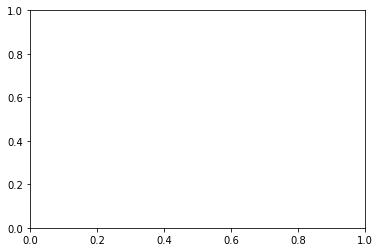

In [2]:
model.evaluate(x_test,y_test)

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]